In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [52]:
mall_df = pd.read_csv('Mall_Customers.csv')
mall_df.describe()               # to check for unrealistic values

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [53]:
# Select relevant features
features = mall_df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()                           # to ensure that all features contribute equally to the clustering
scaled_features = scaler.fit_transform(features)    # applies the standardization to the data

In [54]:
# applying K-Means
k = 5  
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
# for the previous line:          init=;k-means++;  :- specifies method to be k-means++ that improves convergence
                                # max_iter=300      :- max iterations
                                # n_init=10         :- no. of times the algorithm will run with different initial centroid positions
clusters = kmeans.fit_predict(scaled_features)  # applies k-means to scaled features

mall_df['Cluster'] = clusters   # Add cluster information to mall_df
mall_df.describe()              # to check if cluster column is added

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.330000
std,57.879185,13.969007,26.264721,25.823522,1.389516
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,2.000000
max,200.000000,70.000000,137.000000,99.000000,4.000000


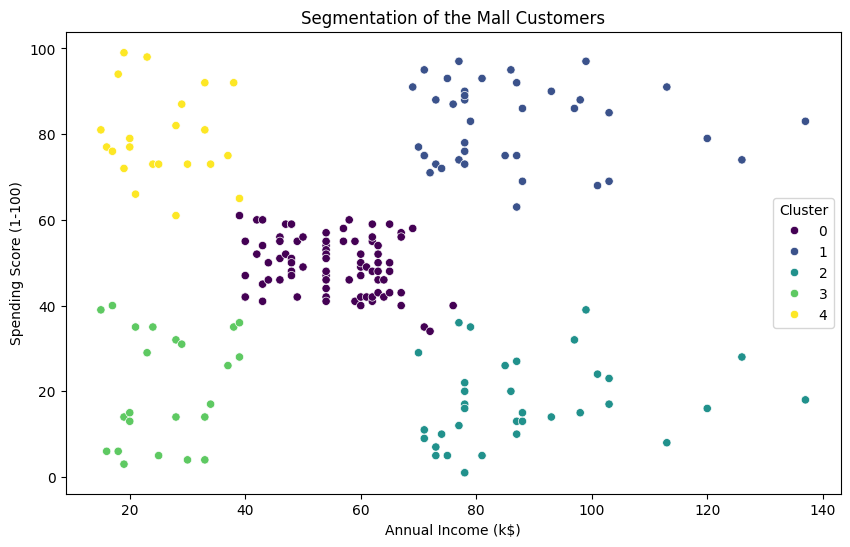

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=mall_df, palette='viridis')
# for the previous line:      hue='Cluster': colors the points based on the cluster column 
plt.title('Segmentation of the Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()
